# CS-UY 3943 - Introduction of Data Science
## Final Project: Tweet Sentiment Extraction

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Taylor Wong
NetID:  tw1835
Group Member 1:  Thomas Scarola
NetID:  tws285
***

# Preliminary Data Analysis

#### Include 1 or 2 plots or data tables that demonstrate initial EDA efforts


1\. Read the data file `train.csv` into your program as a `pandas` `DataFrame`

In [1]:
#Place your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('train.csv')

# dropping ticket, cabin -- missing a lot of data, dont contribute much
# cabin -- captured in pclass and fare
# ticket -- each unique 
df = df.drop(labels=['Ticket', 'Cabin'], axis=1)

df.head(10).sort_values('Survived')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


<hr />

2. Figure out who survived: which column had highest correlation with `Survived`?
<br><br>
First separate into dummy classes to access all categorical data too, then do correlations


In [2]:
# Figure out who survived: rank columns in order of correlation with survival

# convert categorical data to dummies
df_origin = pd.get_dummies(df.drop(columns='Name'))
df_origin = df_origin.drop(labels=['Sex_male'], axis=1)
print(df_origin.columns)

# figure out correlation between survival and all other features
df_origin.corr().sort_values('Survived', 
                                   ascending=False)['Survived']

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


Survived       1.000000
Sex_female     0.543351
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Embarked_S    -0.155660
Pclass        -0.338481
Name: Survived, dtype: float64

Text(0.5, 1.01, 'Percentage of Surivors by Sex')

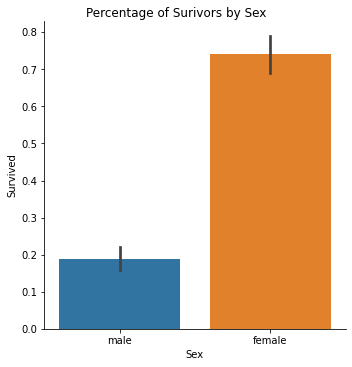

In [3]:
#plot the percentage of people that survived compared to gender
sex_plot = sns.catplot(data=df, x='Sex', y='Survived', kind='bar', margin_titles=True)
sex_plot.fig.suptitle('Percentage of Surivors by Sex', y=1.01)

Text(0.5, 1.01, 'Distribution of Surivors by Age')

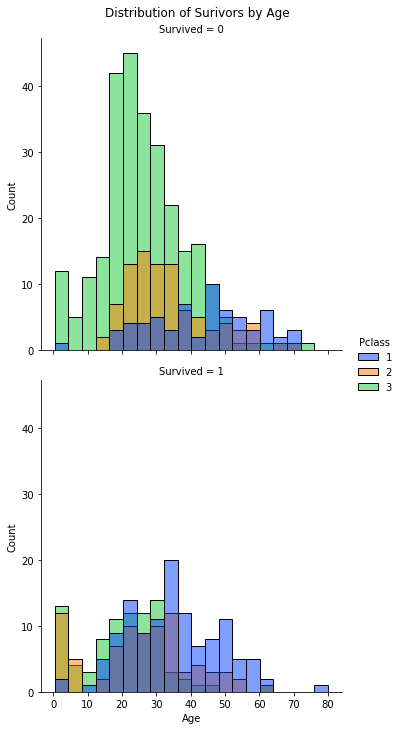

In [4]:

#plot the distribution of people that survived based on their ages, with the hue being there class
age_class_plot = sns.displot(data=df, x='Age', kind='hist', row='Survived', hue='Pclass', palette='bright')
age_class_plot.fig.suptitle('Distribution of Surivors by Age', y=1.01)

Text(0.5, 1.01, 'Distribution of Surivors by Fare')

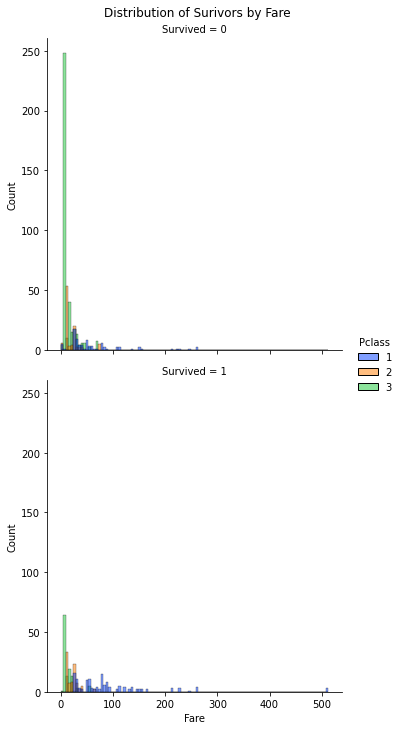

In [5]:

#plot the distribution of people that survived based on their fares, with the hue being there class
fare_class_plot = sns.displot(data=df, x='Fare', kind='hist', row='Survived', hue='Pclass', palette='bright')
fare_class_plot.fig.suptitle('Distribution of Surivors by Fare', y=1.01)


#### Brief discussion of what EDA has revealed about the data

<p>
<span style="color:blue">
    Most influential in determining survival: gender, socio-economic class (Pclass), fare:
    <br><br>
    1. Gender: women 
    <br>
    2. Pclass: upper class (=1, middle=2, lower=3; negative correlation)
    <br>
    3. Fare: those who bought more expensive tickets (related to Pclass; rooms on higher decks)
    <br>
    About 70% of the survivors were female
    <br>
    A vast majority of the people who did not survive were in the lower class, and between the ages of 20 to 30
</span>
</p>

# Acutal Data Analysis

## Build Logistic Regression Models

In [6]:
# import sklearn.datasets
# wine = sklearn.datasets.load_wine()
# wine.data, wine.target

In [7]:
# pre-processing for pclass: convert to numerical labels to their own columns 
df_origin['Pclass'] = pd.Categorical(df_origin.Pclass)
df_origin = pd.get_dummies(df_origin)

In [8]:
df_origin

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,0,0,1,0,1,0
887,888,1,19.0,0,0,30.0000,1,0,0,1,1,0,0
888,889,0,NaN,1,2,23.4500,1,0,0,1,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,0,0,1,0,0


In [9]:
# note: missing age data --> fill in with average ages
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(df_origin)
# df_origin = imp.transform(df_origin)
# df_origin

### Split data into train & test

In [13]:
from sklearn.model_selection import train_test_split

y = df_origin.Survived
X = df_origin.drop(columns='Survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

### Build models: LinearSVC, SVC, LogisticRegression
(Based on Training Data)

#### Using LinearSVC Model

In [15]:
# perform logistic regression using LinearSVC
from sklearn.svm import LinearSVC  
lsvm = LinearSVC()
lsvm.fit(X_train, y_train)
lsvm.score(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Using SVC Model

In [ ]:
# perform logistic regression using SVC
from sklearn.svm import SVC
svm = SVC() # default hyperparameters
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

#### Using Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

### Test models: LinearSVC, SVC, LogisticRegression
(Based on Training Data)

#### Plotting ROC Curve

In [ ]:
from sklearn.metrics import roc_curve